In [1]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

from modules.trainutils import build_dl, piece_class_parse
from modules.trainutils import my_metrics, stratify_sample
from modules.trainutils import show_cf
from modules.tfmsutils import MyResizeDeterm
from modules.expbuilder import default_params, run_exp

In [3]:
test_path = Path('../../../other-chess-data/regulation-pieces-1/crops/')
train_path = Path('../../../rf-chess-data/cropped_v1/')

In [5]:
my_params = {'_bw_images':True}
default_params.update(my_params)

train_dl, learn = run_exp(default_params, 'dummy', 
                          b_cuda=False, b_ret=True)

In [8]:
learn.cbs

(#5) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder,ParamScheduler]

In [12]:
len(learn.dls[1].items)

574

In [11]:
len(learn.dls[0].items)

2296

In [14]:
len(learn.dls[2].items)

228

In [ ]:
len(learn.dls[0].items)

In [9]:
learn.fit_one_cycle(1)

AttributeError: 'Learner' object has no attribute 'pred'

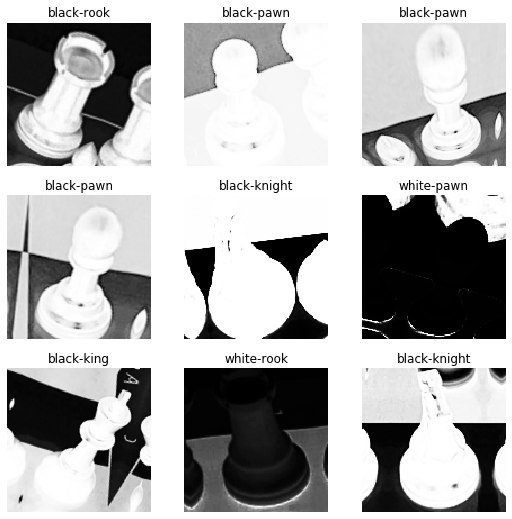

In [6]:
train_dl.show_batch()

### Ordinary Colored

In [4]:
path = untar_data(URLs.PETS)
print(len((path / 'images').ls()))

files = get_image_files(path/"images")
def label_func(f): return f[0].isupper()

dls = ImageDataLoaders.from_name_func(path, files, 
                                      label_func, 
                                      item_tfms=Resize(224)
                                     )

164


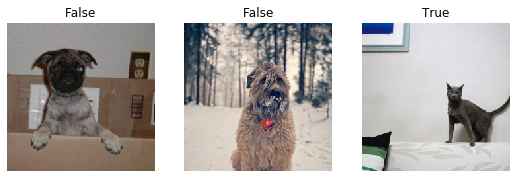

In [5]:
dls.show_batch(max_n=3)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


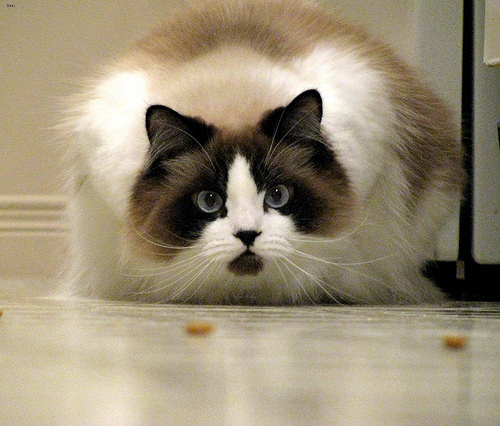

In [6]:
img_p = dls.train.items[0]
img_o = Image.open(img_p)
print(type(img_o))
img_o

<class 'fastai2.vision.core.PILBase'>


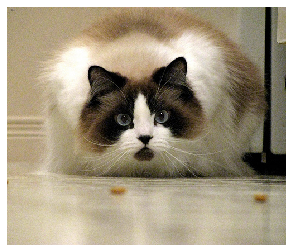

In [7]:
img_pb = PILBase.create(img_p)
print(type(img_pb))
img_pb.show();

<class 'fastai2.vision.core.PILImage'>


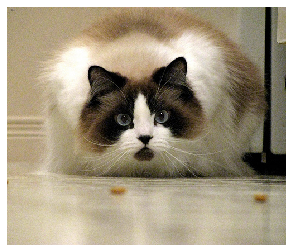

In [8]:
img_pi = PILImage.create(img_p)
print(type(img_pi))
img_pi.show()

### Cartoon

In [9]:
class PILImageBWR(PILImage): 
    _show_args,_open_args = {'cmap':'gray_r'},{'mode': 'L'}
    
class TensorImageBWR(TensorImage): 
    _show_args = PILImageBWR._show_args

PILImageBWR._tensor_cls = TensorImageBWR

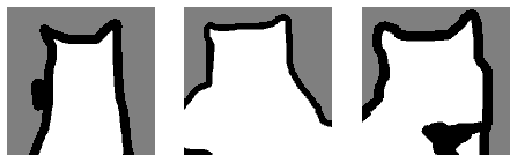

In [10]:
c_dblock = DataBlock(
            (ImageBlock(PILImageBWR),), 
            get_items=get_image_files,
           item_tfms=[Resize(128)])
c_dls = c_dblock.dataloaders(path)
c_dls.show_batch(max_n=3)

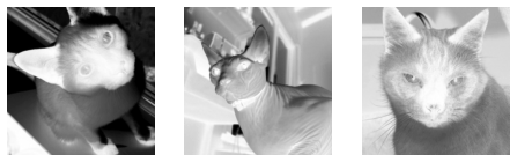

In [11]:
dblock2 = DataBlock(
            (ImageBlock(PILImageBWR),), 
            get_items=get_image_files,
           item_tfms=[Resize(128)])

dls2 = dblock2.dataloaders(path / 'images')
dls2.show_batch(max_n=3)

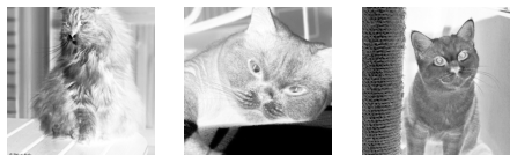

In [12]:
dblock3 = DataBlock(
            (ImageBlock(PILImageBW),), 
            get_items=get_image_files,
           item_tfms=[Resize(128)])

dls3 = dblock3.dataloaders(path / 'images')
dls3.show_batch(max_n=3)

In [13]:
def mypcp(x):
    return piece_class_parse(x.name)

In [14]:
dblock4 = DataBlock(
            (ImageBlock(PILImageBW),CategoryBlock),
            get_items=get_image_files,
            get_y=mypcp,
            item_tfms=[Resize(128)],
            )
ds4 = dblock4.datasets(train_path)
dls4 = dblock4.dataloaders(train_path)

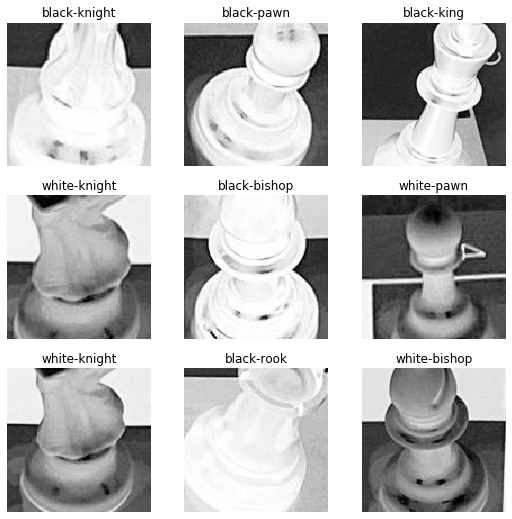

In [15]:

dls4.show_batch()

In [16]:
learn = cnn_learner(dls4, resnet18, metrics=[accuracy])

In [17]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.164468,0.334324,0.907665,02:33


In [18]:
from modules.trainutils import my_test_metrics

In [19]:
my_test_metrics(learn, test_path)

(3.2093710446109376, 0.21666666666666667)

In [38]:
c_dls.tfms

Pipeline: PILBase.create

In [42]:
img_p2 = c_dls.train.items[0]
img_p2

Path('/home/user/.fastai/data/oxford-iiit-pet/annotations/trimaps/leonberger_136.png')

In [44]:
img_p2

Path('/home/user/.fastai/data/oxford-iiit-pet/annotations/trimaps/leonberger_136.png')

In [45]:
img_p

Path('/home/user/.fastai/data/oxford-iiit-pet/images/Birman_20.jpg')

In [39]:
c_pil = c_dls.tfms(img_p)

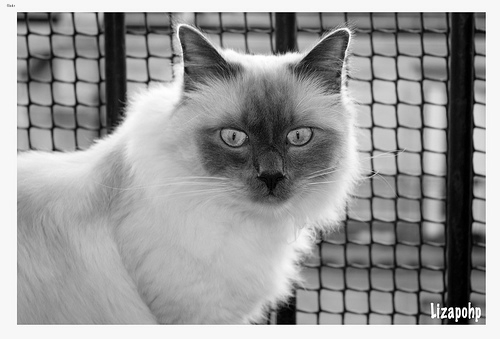

In [40]:
c_pil

In [33]:
ToTensor()(c_pil)

TensorImageBWR([[[247, 248, 246,  ..., 247, 247, 247],
         [246, 248, 248,  ..., 247, 247, 247],
         [248, 246, 246,  ..., 247, 247, 247],
         ...,
         [247, 247, 247,  ..., 247, 247, 247],
         [247, 247, 247,  ..., 247, 247, 247],
         [247, 247, 247,  ..., 247, 247, 247]]], dtype=torch.uint8)

In [34]:
type(c_pil)

__main__.PILImageBWR

In [64]:
d_pil = dls.tfms[0](img_p)

In [65]:
type(d_pil)

fastai2.vision.core.PILImage

In [67]:
# d_pil

In [50]:
c_ai = c_dls.after_item(c_pil) 

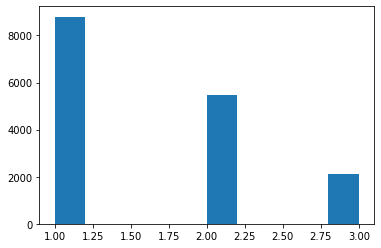

In [51]:
plt.hist(c_ai.flatten().tolist());

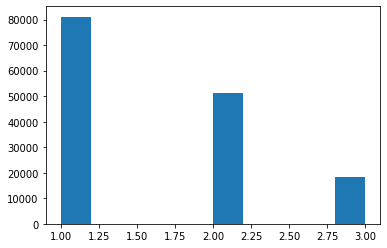

In [52]:
plt.hist(dls.after_item(d_pil).flatten().tolist());

In [11]:
c_dls.after_item

Pipeline: Resize -> ToTensor

In [12]:
c_dls.after_batch

Pipeline: IntToFloatTensor

In [20]:
x = c_dls.one_batch()[0]
c_img_1 = x[0]
# show_image(c_img_1)

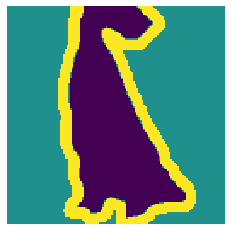

In [22]:
show_image(c_img_1)